In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json 
import seaborn as sns
%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

#1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [3]:
params = {
    'query_text' : 'fire',
    'year' : '2016',
    '$limit':4800
}

# Use .get to get response
response = requests.get(endpoint, params = params)
response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [4]:
# Convert into dictionary
fire_results = response.json()
fire_results

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [5]:
# Convert to DF
fire_df = pd.DataFrame(fire_results)
fire_df.sort_values('query_count', ascending=False)

#which month had the most searches? August

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire
2,March,2016,32,fire
10,November,2016,32,fire
5,June,2016,31,fire
3,April,2016,26,fire
4,May,2016,24,fire


#2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [6]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=48000'

response_query = requests.get(endpoint2)
response_query.text

'[{"month_name":"March","year":"2014","query_count":"101","query_text":"permits"}\n,{"month_name":"January","year":"2015","query_count":"101","query_text":"criminal court clerk"}\n,{"month_name":"September","year":"2015","query_count":"101","query_text":"codes"}\n,{"month_name":"March","year":"2016","query_count":"101","query_text":"police"}\n,{"month_name":"March","year":"2016","query_count":"101","query_text":"civil service"}\n,{"month_name":"November","year":"2016","query_count":"101","query_text":"jobs"}\n,{"month_name":"November","year":"2017","query_count":"101","query_text":"metro holidays"}\n,{"month_name":"November","year":"2017","query_count":"101","query_text":"longevity pay"}\n,{"month_name":"January","year":"2018","query_count":"101","query_text":"West Nashville Heights Church of Christ"}\n,{"month_name":"January","year":"2018","query_count":"101","query_text":"property maps"}\n,{"month_name":"March","year":"2018","query_count":"101","query_text":"public works"}\n,{"month_

In [7]:
query_100 = response_query.json()
query_df = pd.DataFrame(query_100)
query_df['month_name'].count()

# How many times did this occur? 1262

1262

Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [8]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$q=codes&$where=query_count > 100&$limit=48000'
response3 = requests.get(endpoint3)
response3.text

'[{"month_name":"January","year":"2017","query_count":"115","query_text":"codes"}\n,{"month_name":"August","year":"2015","query_count":"117","query_text":"codes"}\n,{"month_name":"September","year":"2015","query_count":"101","query_text":"codes"}\n,{"month_name":"February","year":"2016","query_count":"121","query_text":"codes"}\n,{"month_name":"April","year":"2016","query_count":"111","query_text":"codes"}\n,{"month_name":"May","year":"2016","query_count":"107","query_text":"codes"}\n,{"month_name":"August","year":"2016","query_count":"104","query_text":"codes"}\n,{"month_name":"February","year":"2017","query_count":"150","query_text":"codes"}\n,{"month_name":"March","year":"2017","query_count":"158","query_text":"codes"}\n,{"month_name":"April","year":"2017","query_count":"190","query_text":"codes"}\n,{"month_name":"May","year":"2017","query_count":"269","query_text":"codes"}\n,{"month_name":"June","year":"2017","query_count":"192","query_text":"codes"}\n,{"month_name":"July","year":"

In [9]:
query_100_codes = response3.json()
query_100_codes

[{'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '121',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'February',
  'year': '2017',
  'query_count': '150',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2017',
  'query_count': '158',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '190',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2017',
  'query_count': 

In [10]:
query100codes_df = pd.DataFrame(query_100_codes)
query100codes_df['year'].count()

#How many times did this occur? 58

58

Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [11]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=maps&$limit=48000'
response4 = requests.get(endpoint4)
response4.text

'[{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"February","year":"2014","query_count":"140","query_text":"maps"}\n,{"month_name":"March","year":"2014","query_count":"144","query_text":"maps"}\n,{"month_name":"April","year":"2014","query_count":"152","query_text":"maps"}\n,{"month_name":"May","year":"2014","query_count":"119","query_text":"maps"}\n,{"month_name":"June","year":"2014","query_count":"121","query_text":"maps"}\n,{"month_name":"July","year":"2014","query_count":"121","query_text":"maps"}\n,{"month_name":"August","year":"2014","query_count":"118","query_text":"maps"}\n,{"month_name":"September","year":"2014","query_count":"115","query_text":"maps"}\n,{"month_name":"October","year":"2014","query_count":"100","query_text":"maps"}\n,{"month_name":"November","year":"2014","query_count":"82","query_text":"maps"}\n,{"month_name":"December","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2015","

In [12]:
top_500 = response4.json()
top_500

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [15]:
top500_df = pd.DataFrame(top_500)
top500_df.head()

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN


In [16]:
top500_df['date'] = pd.to_datetime(top500_df.month_name.astype(str) + '/' + top500_df.year.astype(str), format='%B/%Y')
top500_df.head(20)

,month_name,year,query_count,query_text,month,date
0,January,2014,97,maps,NaN,2014-01-01
1,February,2014,140,maps,NaN,2014-02-01
2,March,2014,144,maps,NaN,2014-03-01
3,April,2014,152,maps,NaN,2014-04-01
4,May,2014,119,maps,NaN,2014-05-01
5,June,2014,121,maps,NaN,2014-06-01
6,July,2014,121,maps,NaN,2014-07-01
7,August,2014,118,maps,NaN,2014-08-01
8,September,2014,115,maps,NaN,2014-09-01
9,October,2014,100,maps,NaN,2014-10-01


In [17]:
grouped_500 = top500_df.groupby('date')['query_count'].sum().reset_index(name='Total Searches')
grouped_500

,date,Total Searches
0,2014-01-01,97
1,2014-02-01,140
2,2014-03-01,144
3,2014-04-01,152
4,2014-05-01,119
...,...,...
77,2020-11-01,86
78,2020-12-01,113
79,2021-03-01,132
80,2021-04-01,148


In [24]:
grouped_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            82 non-null     datetime64[ns]
 1   Total Searches  82 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ KB


In [34]:
grouped_500['Total Searches'] = grouped_500['Total Searches'].astype(int)
grouped_500.dtypes

date              datetime64[ns]
Total Searches             int32
dtype: object

Text(0.5, 1.0, 'Total Monthly Map Searches')

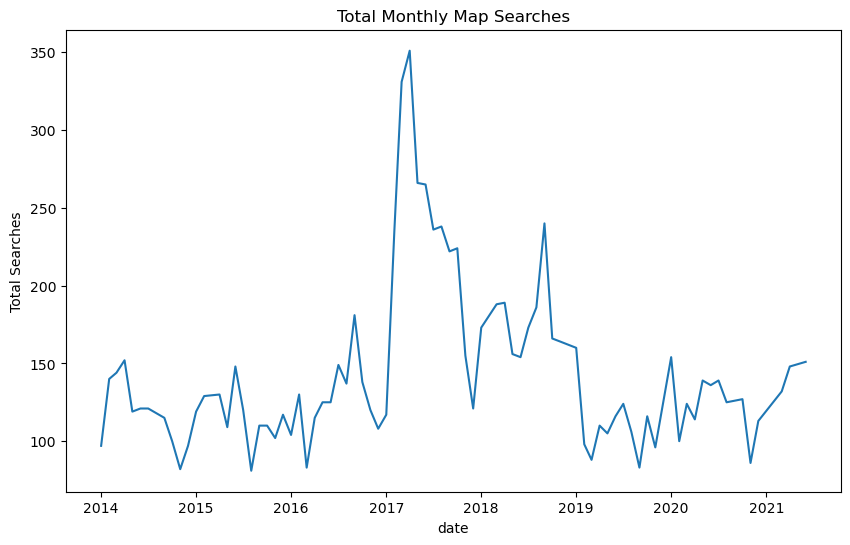

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="Total Searches", data=grouped_500)
plt.title('Total Monthly Map Searches')